# Deutsch-Joszja Algorithm


In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram

In [2]:
# Create quantum/classical registers and a quantum circuit

qin = QuantumRegister(2)
qout = QuantumRegister(1)
c = ClassicalRegister(2)
qc = QuantumCircuit(qin,qout,c)


In [3]:
# Copy the equal2 function from Example 3
# This is balanced function

def equal2(circ, input, output) :
    circ.cx(input[0],output)
    circ.cx(input[1],output)
    circ.x(output)

# This is a constant function that doesn't change anything
def constant2(circ, input, output) :
    circ.iden(output)

In [4]:
# Build the Deutsh-Josza circuit

# First apply phase shift to negate where f(x) == 1
qc.h(qin)
qc.x(qout)
qc.h(qout)
equal2(qc,qin,qout)
qc.h(qout)
qc.barrier()  # barrier to make circuit look nicer

# Then Walsh-Hadamard on input bits
qc.h(qin)

# For constant function, output is |00> with probability 1
# For balanced function, output is something other than |00> with probability 1
qc.measure(qin,c)

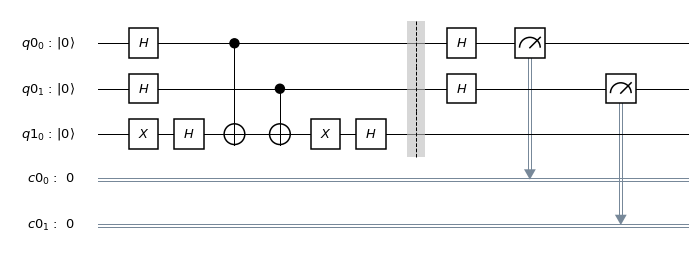

In [5]:
qc.draw(output='mpl')

{'11': 512}


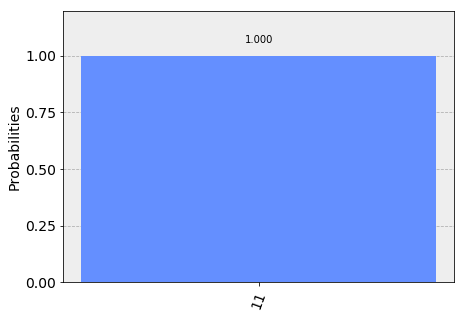

In [6]:
# Simulate and show results
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=512)  # shots default = 1024
result = job.result()
print(result.get_counts())
plot_histogram(result.get_counts())